# What's my (your) face saying?

1. Make a copy

2. [Sign-up for the Parallel Dots API here](https://www.paralleldots.com/)

_you will have to verify your email *before* using the api_


3. Take a picture with your webcam and determine the emotion of said picture.

4. Beat that baseline!!!

```{'output': 'No face detected.'} ```

:(


In [1]:
!pip install paralleldots

In [2]:
from IPython.display import HTML, Image, Javascript
from google.colab.output import eval_js
from base64 import b64decode



def take_photo(filename='photo.jpg', quality=0.8):
  display(VIDEO_JS)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

ModuleNotFoundError: No module named 'google.colab'

In [0]:
import paralleldots
paralleldots.set_api_key("PUT YOUR API KEY BETWEEN THESE QUOTES")


In [0]:
VIDEO_JS = Javascript('''
async function takePhoto(quality) {
  const div = document.createElement('div');
  const capture = document.createElement('button');
  capture.textContent = 'Capture';
  div.appendChild(capture);

  const video = document.createElement('video');
  video.style.display = 'block';
  const stream = await navigator.mediaDevices.getUserMedia({video: true});
  
  document.body.appendChild(div);
  div.appendChild(video);
  video.srcObject = stream;
  await video.play();

  // Resize the output to fit the video element.
  google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

  // Wait for Capture to be clicked.
  await new Promise((resolve) => capture.onclick = resolve);

  const canvas = document.createElement('canvas');
  canvas.width = video.videoWidth;
  canvas.height = video.videoHeight;
  canvas.getContext('2d').drawImage(video, 0, 0);
  stream.getVideoTracks()[0].stop();
  div.remove();
  return canvas.toDataURL('image/jpeg', quality);
}
''')

In [0]:
# This is where you take the picture.
# 1. you will be asked for permission to access to the webcam. This worked
#    better when I did *not* have the webcam remember my choice.
# 2. Press the capture button to take the photo.jpg

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
except Exception as err:
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


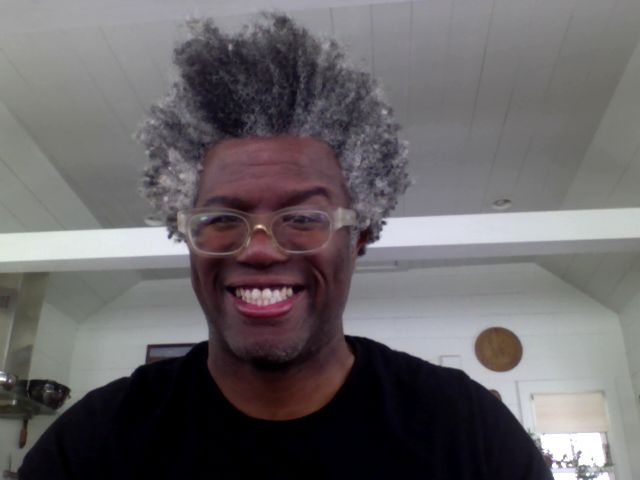

In [0]:
from IPython.display import Image
Image(filename='photo.jpg') 

In [0]:
### You can also try uploading a pic from your computer

#from google.colab import files
#files.upload()

In [0]:
!ls   # what
!pwd  # where


photo.jpg  sample_data	settings.cfg
/content


In [0]:
CONTENT_IMAGE = "photo.jpg"

In [0]:
path= "/content/"+CONTENT_IMAGE

In [0]:
print( paralleldots.facial_emotion( path ) ) # all I get is {'output': 'No face detected.'}

{'output': 'No face detected.'}


In [0]:
result = paralleldots.facial_emotion( path )

In [0]:
mood = result['facial_emotion'][0]['tag']


KeyError: ignored

In [0]:
print(mood)

